<a href="https://colab.research.google.com/github/yamkas/Regression/blob/master/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>Regression</font></h1>

## Prediction with Python

Dataset ini berisi harga jual rumah untuk King County, yang mencakup Seattle. Data ini termasuk data penjualan rumah antara bulan Mei 2014 dan bulan Mei 2015.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


### 1 Importing dependencies

>Kita akan meng import software library yang diperlukan untuk sesi ini

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

### 2 Uploading the data into Jupyter notebook

>Kita akan meng upload file kc_house_data_NaN.csv dari cloud kedalam Jupyter notebook di google colabs ini

In [ ]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

Sebagai alternatif, file kc_house_data_NaN.csv juga disertakan bersama dengan file ipynb, sehingga apabila tidak dapat men download langsung, dpt meng upload file tsb kedalam colabs via content maupun link ke google drive

### 3 Data Exploration

>Kita akan berusaha memahami dan memperoleh pengetahuan lebih banyak tentang data yang kita upload

In [ ]:
df.head() #memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail() #memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
df.columns #memperlihatkan nama kolom dari sebuah pandas dataframe

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
df.shape #shape adalah tuple yang memberikan informasi dimensi dari sebuah array

(21613, 22)

In [ ]:
df.info #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<bound method DataFrame.info of        Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0               0  7129300520  20141013T000000  221900.0       3.0       1.00   
1               1  6414100192  20141209T000000  538000.0       3.0       2.25   
2               2  5631500400  20150225T000000  180000.0       2.0       1.00   
3               3  2487200875  20141209T000000  604000.0       4.0       3.00   
4               4  1954400510  20150218T000000  510000.0       3.0       2.00   
...           ...         ...              ...       ...       ...        ...   
21608       21608   263000018  20140521T000000  360000.0       3.0       2.50   
21609       21609  6600060120  20150223T000000  400000.0       4.0       2.50   
21610       21610  1523300141  20140623T000000  402101.0       2.0       0.75   
21611       21611   291310100  20150116T000000  400000.0       3.0       2.50   
21612       21612  1523300157  20141015T000000  325000.0       2.0       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0             1180      5650     1.0           0  ...      7        1180   
1             2570      7242     2.0           0  ...      7        2170   
2              770     10000     1.0           0  ...      6         770   
3             1960      5000     1.0           0  ...      7        1050   
4             1680      8080     1.0           0  ...      8        1680   
...            ...       ...     ...         ...  ...    ...         ...   
21608         1530      1131     3.0           0  ...      8        1530   
21609         2310      5813     2.0           0  ...      8        2310   
21610         1020      1350     2.0           0  ...      7        1020   
21611         1600      2388     2.0           0  ...      8        1600   
21612         1020      1076     2.0           0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0                  0      1955             0    98178  47.5112 -122.257   
1                400      1951          1991    98125  47.7210 -122.319   
2                  0      1933             0    98028  47.7379 -122.233   
3                910      1965             0    98136  47.5208 -122.393   
4                  0      1987             0    98074  47.6168 -122.045   
...              ...       ...           ...      ...      ...      ...   
21608              0      2009             0    98103  47.6993 -122.346   
21609              0      2014             0    98146  47.5107 -122.362   
21610              0      2009             0    98144  47.5944 -122.299   
21611              0      2004             0    98027  47.5345 -122.069   
21612              0      2008             0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21608           1530        1509  
21609           1830        7200  
21610           1020        2007  
21611           1410        1287  
21612           1020        1357  

[21613 rows x 22 columns]>

In [ ]:
df.dtypes #memperlihatkan data type untuk tiap field yang ada

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.describe() #describe() adalah sebuah metode dalam pandas dataframe yang digunakan untuk melakukan kalkulasi dari data statistic seperti percentile, mean, std, min, max dari serangkaian nilai numerik dari sebuah series atau dataframe

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum() #isnull() adalah sebuah fungsi untuk mendeteksi missing values dalam serangkaian obyek. Sum() adalah fungsi untuk menjumlahkan

Unnamed: 0        0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

Kita dapat melihat bahwa ada missing value pada kolom bedrooms dan bathrooms

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Kita akan mengganti missing values pada kolom 'bedrooms' dengan rata-rata dari kolom tsb menggunakan metode replace(). Jangan lupa untuk men set parameter inplace menjadi True

In [ ]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Kita juga akan mengganti missing values pada kolom 'bathrooms' dengan rata-rata dari kolom tsb menggunakan metode replace(). Jangan lupa untuk men set parameter inplace menjadi True

In [ ]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [ ]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


Sekarang null value pada bedrooms dan bathrooms telah tiada

### 4 Data Analysis

Gunakan metode value_counts untuk menghitung jumlah dari rumah yang memiliki nilai lantai yang unik, kemudian metode .to_frame() untuk mengubahnya menjadi dataframe.

In [ ]:
df.floors.value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Gunakan fungsi boxplot dalam seaborn library untuk menentukan apakah rumah dengan waterfront (atau tidak memiliki waterfront) memiliki lebih banyak price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

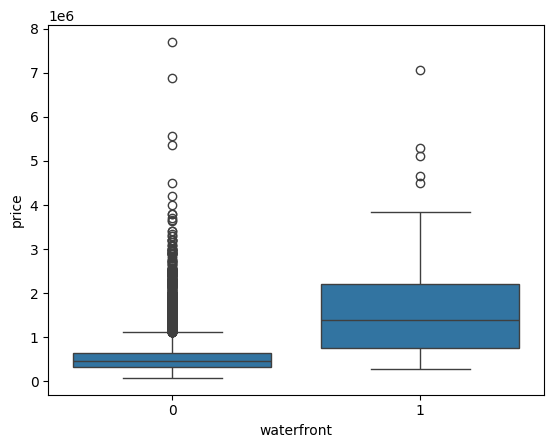

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df)

Gunakan fungsi regplot pada seaborn library untuk menentukan apakah fitur sqft_above berkorelasi negatif atau positif terhadap price.

(0.0, 8081250.0)

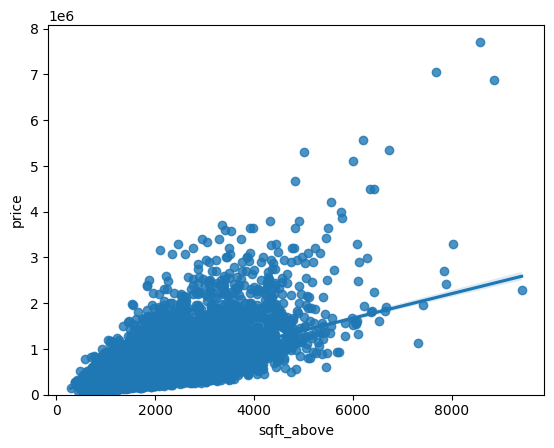

In [ ]:
sns.regplot(x=df["sqft_above"],y=df["price"],data=df)
plt.ylim(0,)

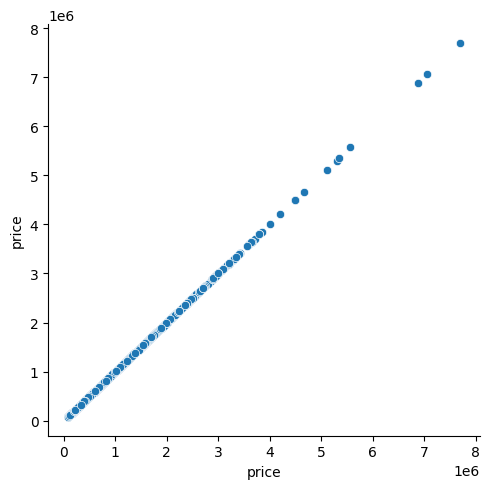

In [ ]:
sns.relplot(x="price", y="price", data=df) #kita akan melakukan visualisasi terhadap data untuk melihat hubungan antara dua variabel

Kita dapat menggunakan metode corr() dari Pandas untuk menentukan fitur selain price yang paling berkorelasi dengan price.

In [ ]:
df = df.drop(columns=['date'])

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

### 5 Ordinary Least Square (OLS)

In [ ]:
model_1 = sm.ols(formula='price ~ floors + waterfront + lat + bedrooms + sqft_basement + view + bathrooms + sqft_living15 + sqft_above + grade + sqft_living', data=df).fit()

In [ ]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4151.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        09:39:55   Log-Likelihood:            -2.9602e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21602   BIC:                         5.921e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.239e+07   5.12e+05    -63.259

In [ ]:
model_2 = sm.ols(formula='price ~ floors + waterfront + lat + bedrooms + sqft_basement + view + sqft_living15 + sqft_above + grade + sqft_living', data=df).fit()

In [ ]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     4612.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        09:45:28   Log-Likelihood:            -2.9602e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21603   BIC:                         5.921e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.242e+07   5.11e+05    -63.473

In [ ]:
model_3 = sm.ols(formula='price ~ floors + waterfront + lat + bedrooms + sqft_basement + view + sqft_above + grade + sqft_living', data=df).fit()

In [ ]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5188.
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        09:46:03   Log-Likelihood:            -2.9602e+05
No. Observations:               21613   AIC:                         5.921e+05
Df Residuals:                   21604   BIC:                         5.921e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.243e+07   5.11e+05    -63.487

##Prediction with Python

### 5 Model Development

Kita dapat memakai model linear regression menggunakan fitur 'long' dan menghitung R^2.

In [ ]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Gunakan model linear regression untuk memprediksi 'price' dengan menggunakan fitur 'sqft_living' kemudian hitung R^2.

In [ ]:
x=df[['sqft_living']]
y=df.price
lr=LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.4928532179037931

Gunakan model linear regression untuk memprediksi 'price' menggunakan daftar fitur sbb:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view", "sqft_above","grade","sqft_living"]

Kemudian hitung R^2.

In [ ]:
x=df[features]
y=df.price
lr.fit(x,y)
lr.score(x,y)

0.6576936711178945

>Buatlah list of tuples, dengan elemen pertama dari tuple berisikan nama dari estimator:
>>'scale'

>>'polynomial'

>>'model'

>Dan elemen kedua dari tuple berisi model constructor

>>StandardScaler()

>>PolynomialFeatures(include_bias=False)

>>LinearRegression()

In [ ]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Gunakan list tsb untuk membuat pipeline object untuk memprediksi 'price', fit object tsb menggunakan features di dalam list features, dan hitung R^2.

In [ ]:
x=df[features]
y=df.price
pipe=Pipeline(Input)
pipe.fit(x,y)
pipe.score(x,y)

0.7421809859067732

### 6 Model Evaluation and Refinement

Impor modules yang diperlukan:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Kita akan membagi data menjadi training dan testing sets:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Buatlah Ridge regression object menggunakan training data, set  regularization parameter menjadi 0.1, dan hitung R^2 menggunakan test data.

In [ ]:
from sklearn.linear_model import Ridge

Linear least squares dengan l2 regularization.

Model ini merupakan solusi regression model dimana loss function merupakan fungsi linear least square dan regularization ditentukan oleh l2-norm. Yang juga dikenal sebagai Ridge Regression or Tikhonov regularization. Estimator ini memiliki built-in support untuk multi-variate regression (i.e., saat y merupakan 2d-array dari shape [n_samples, n_targets]).

In [ ]:
rm=Ridge(alpha=0.1)
rm.fit(x_train,y_train)
rm.score(x_test,y_test)

0.6480522180869507

Lakukan transformasi second order polynomial pada training data dan testing data. Buatlah Ridge regression object menggunakan training data, set regularisation parameter menjadi 0.1, dan hitung R^2 menggunakan test data yang ada.

In [ ]:
pr=PolynomialFeatures(degree=2) #second order polynomial
x_train_pr=pr.fit_transform(x_train) #train data
x_test_pr=pr.fit_transform(x_test) #test data

rr=Ridge(alpha=0.1) #Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.
rr.fit(x_train_pr,y_train)
rr.score(x_test_pr,y_test)

0.6873674520358646